### THEORY:
1. V-Plot refers to a visualization technique or software tool used to represent and analyze data in a biological context.
2. When a protein binds DNA, it shields a region, resukting in a characteristic "V" shape in the plot: the x-axis (X) is the distance of fragment centers from the binding site, the y-axis (Y) is the fragment size, and the color (Z) indicates the count of fragments at each coordinate.
5. We have to show that V-formation using the input data.
6. Let's see the code for this:

In [1]:
# Importing all necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

In [4]:
count_dict = defaultdict(int)
with open('mapped.bed') as f:
    for line in f:
        cols = line.strip().split('\t')
        c1 = (int(cols[2]) + int(cols[3])) // 2   # Center of column 3 and 4
        c2 = (int(cols[8]) + int(cols[9])) // 2   # Center of column 9 and 10
        x = c2 - c1  # defined in problem statement
        y = int(cols[9]) - int(cols[8])
        count_dict[(x, y)] += 1


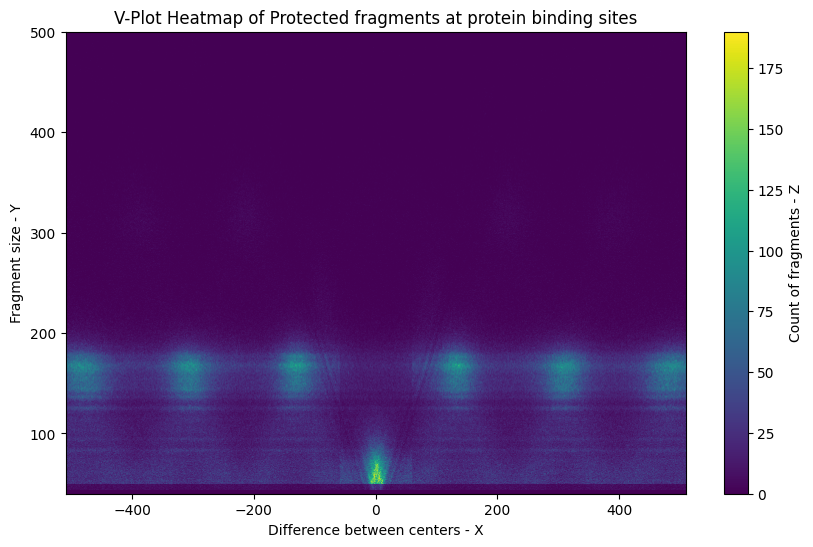

In [7]:
# Constructing the heatmap
x_vals = []
y_vals = []
z_vals = []

for (x, y), z in count_dict.items():
    x_vals.append(x)
    y_vals.append(y)
    z_vals.append(z)

x_unique = sorted(set(x_vals))
y_unique = sorted(set(y_vals))

xi = {j: i for i, j in enumerate(x_unique)}
yi = {j: i for i, j in enumerate(y_unique)}

# Fix: Switch dimensions to match accessing pattern
heatmap = np.zeros((len(y_unique), len(x_unique)))

for x, y, z in zip(x_vals, y_vals, z_vals):
    if x in xi and y in yi:
        heatmap[yi[y], xi[x]] = z

plt.figure(figsize = (10, 6))
plt.imshow(
    heatmap, aspect='auto', cmap='viridis', origin='lower', 
    extent=[min(x_unique), max(x_unique), min(y_unique), max(y_unique)]
)
plt.title('V-Plot Heatmap of Protected fragments at protein binding sites')
plt.colorbar(label='Count of fragments - Z')
plt.xlabel('Difference between centers - X')
plt.ylabel('Fragment size - Y')
plt.show()


### Analysis of V-Plot:
1. Fragments with centers far from the binding site must be longer to overlap the binding site.
2. Fragments with centers near the binding site can be shorter and still overlap.
3. The minimum fragment length that can overlap the binding site creates the tip of the "V".